<h1>Projet-3 : Concevez une application au service de la santé publique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique" data-toc-modified-id="Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique-1">Projet-3 : Concevez une application au service de la santé publique</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span></li><li><span><a href="#Environnement" data-toc-modified-id="Environnement-1.2">Environnement</a></span></li></ul></li><li><span><a href="#1.-Chargement-des-données" data-toc-modified-id="1.-Chargement-des-données-2">1. Chargement des données</a></span></li><li><span><a href="#2.-Nettoyage-du-jeu-de-données" data-toc-modified-id="2.-Nettoyage-du-jeu-de-données-3">2. Nettoyage du jeu de données</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Nettoyage-des-types" data-toc-modified-id="2.1-Nettoyage-des-types-3.0.1">2.1 Nettoyage des types</a></span></li><li><span><a href="#2.2-Les-NaN" data-toc-modified-id="2.2-Les-NaN-3.0.2">2.2 Les NaN</a></span><ul class="toc-item"><li><span><a href="#On-supprime-les-colonnes-qui-ne-sont-jamais-utilisées" data-toc-modified-id="On-supprime-les-colonnes-qui-ne-sont-jamais-utilisées-3.0.2.1">On supprime les colonnes qui ne sont jamais utilisées</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#On-explore-les-GENERAL-INFORMATION" data-toc-modified-id="On-explore-les-GENERAL-INFORMATION-4">On explore les GENERAL INFORMATION</a></span></li><li><span><a href="#On-explore-les-TAGS" data-toc-modified-id="On-explore-les-TAGS-5">On explore les TAGS</a></span></li><li><span><a href="#On-explore-les-INGREDIENTS" data-toc-modified-id="On-explore-les-INGREDIENTS-6">On explore les INGREDIENTS</a></span></li><li><span><a href="#On-explore-les-NUTRITION-FACTS" data-toc-modified-id="On-explore-les-NUTRITION-FACTS-7">On explore les NUTRITION FACTS</a></span></li><li><span><a href="#Idée-d'application" data-toc-modified-id="Idée-d'application-8">Idée d'application</a></span><ul class="toc-item"><li><span><a href="#3.1-Selection-des-colonnes-information-non-numériques-utiles-pour-notre-application" data-toc-modified-id="3.1-Selection-des-colonnes-information-non-numériques-utiles-pour-notre-application-8.1">3.1 Selection des colonnes information non numériques utiles pour notre application</a></span></li></ul></li></ul></div>

<a name='sommaire'>
    <img src="assets/img/combo_logo.jpg" />
</a>

# Projet-3 : Concevez une application au service de la santé publique
## Introduction 
***
- Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

- **L'idée de l'application** : aide à l'identification des produits à surveiller dans le cas de régime alimentaire liées à la surveillance en utilisant la base d'OpenFood Facts
***
## Environnement

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sys
import warnings
import IPython as ip
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno 
# Configuration pour travail avec fichier python "tools" de fonctions
%load_ext autoreload
%aimport tools

# Set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Recharger les modules pour la conception des fichiers tools

%autoreload 1

warnings.filterwarnings("ignore")

# 1. Chargement des données

In [2]:
# Import données
data = pd.read_csv('assets/datas/openfoodfacts.csv', sep='\t', low_memory=False)

# 2. Nettoyage du jeu de données

In [3]:
# Afficher le nombre de lignes de colonnes et de doublon je de données initial
tools.get_info_data(data,doublon=True)

------------------------------------------------------------------
Taille du jeu de données 

Nombre de lignes : 320772 lignes
Nombre de colonnes : 162 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
------------------------------------------------------------------


In [4]:
# Afficher les 3 premières lignes du jeu de données 
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [5]:
# Création d'un df de travail
df = data.copy()

### 2.1 Nettoyage des types

-------------------------------------------------------------
Type de variable pour chacune des variables



code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,56,34.570000


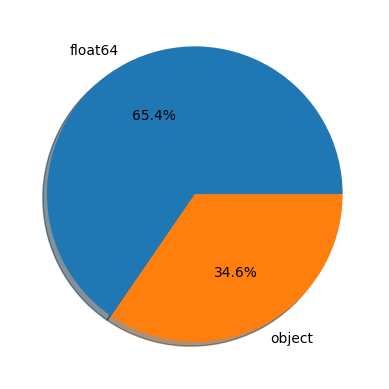

In [6]:
tools.get_types_variables(df,True,True,True)

**Erreurs de formattage** : 
- On convertie  'created_datetime','last_modified_datetime' en date

**Erreurs lexicales** : dans les colonnes 'created_datetime','last_modified_datetime 
- On supprime les erreurs en les remplaçant par NaN


In [7]:
# On supprime les erreurs
df.loc[df['created_datetime']=='Dia,Sogeres','created_datetime']='NaN'
df.loc[df['created_datetime']=='SuperU','created_datetime']='NaN'
df.loc[df['created_datetime']=='Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Auchan','created_datetime']='NaN'
df.loc[df['created_datetime']=='Carrefour market','created_datetime']='NaN'
df.loc[df['created_datetime']=='SuperU,Leclerc','created_datetime']='NaN'
df.loc[df['created_datetime']=='Spar','created_datetime']='NaN'
df.loc[df['created_datetime']=='Banque alimentaire','created_datetime']='NaN'
df.loc[df['created_datetime']=='Leclerc','created_datetime']='NaN'
df.loc[df['created_datetime']=='Auchan,Super U','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Cora','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'

# On convertit la colonne created_datetime au format date
df["created_datetime"] =  pd.to_datetime(df["created_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [8]:
# On supprime les erreurs
df.loc[df['created_t']=='France','created_t']='NaN'
df.loc[df['created_t']=='Villecresnes,Villeurbanne,France','created_t']='NaN'
df.loc[df['created_t']=='Veynes,France','created_t']='NaN'
df.loc[df['created_t']=='Saint-Priest,France','created_t']='NaN'
df.loc[df['created_t']=='Torcy 77,France','created_t']='NaN'
df.loc[df['created_t']=='Villers Bocage 80260,France','created_t']='NaN'
df.loc[df['created_t']=='Montgermont','created_t']='NaN'
df.loc[df['created_t']=='Marseille 5°,France','created_t']='NaN'
df.loc[df['created_t']=='France,Nantes,Carquefou','created_t']='NaN'
df.loc[df['created_t']=='Courrières,France','created_t']='NaN'
df.loc[df['created_t']=='Brétigny-sur-Orge,Marseille 5°','created_t']='NaN'
df.loc[df['created_t']=='Brétigny-sur-Orge,Marseille 5°,France','created_t']='NaN'
df.loc[df['created_t']=='France','created_t']='NaN'

# On convertit la colonne created_t au format date
df['created_t'] = pd.to_datetime(df['created_t'],unit='s')

In [9]:
# On supprime les erreurs
df.loc[df['last_modified_t']=='Belgique,France','last_modified_t']='NaN'
df.loc[df['last_modified_t']=='France','last_modified_t']='NaN'
df.loc[df['last_modified_t']=='Belgique,France, en:switzerland','last_modified_t']='NaN'
df.loc[df['last_modified_t']=='Suisse,France','last_modified_t']='NaN'

# On convertit la colonne last_modified_t au format date
df['last_modified_t'] = pd.to_datetime(df['last_modified_t'],unit='s')

In [10]:
# On supprime les erreurs de saisie
# data.loc[data['montant']==-15000, 'montant'] = -14.39
df.loc[df['last_modified_datetime']=='en:belgium,en:france','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:france','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:belgium,en:france,en:switzerland','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:france,en:switzerland','last_modified_datetime']='NaN'

# On convertit la colonne last_modified_dattetime au format date
df["last_modified_datetime"] =  pd.to_datetime(df["last_modified_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [11]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46,2016-09-17 09:17:46,2016-09-17 09:18:13,2016-09-17 09:18:13,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),N

-------------------------------------------------------------
Type de variable pour chacune des variables



code                                                  object
url                                                   object
creator                                               object
created_t                                     datetime64[ns]
created_datetime                              datetime64[ns]
last_modified_t                               datetime64[ns]
last_modified_datetime                        datetime64[ns]
product_name                                          object
generic_name                                          object
quantity                                              object
packaging                                             object
packaging_tags                                        object
brands                                                object
brands_tags                                           object
categories                                            object
categories_tags                                       object
categories_fr           


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,52,32.100000
datetime64[ns],4,2.470000


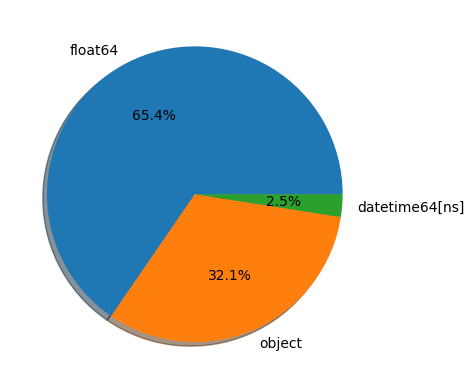

In [12]:
tools.get_types_variables(df,True,True,True)

In [13]:
# On crée des listes selon type
float_columns  = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns


# On crée une fonction pour la suite
def get_infos_df(type) :
    '''mise à jours des valeurs float_columns et objects''' 
    float_columns  = df.select_dtypes(include=['float64']).columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    print("--------------GENERAL----------------------------------")
    print(f"taille df : {df.shape}")
    print("")
    if type:
        print("--------------OBJECT----------------------------------")
        print(f"Nombre de colonne du type Object : {df[object_columns].shape[1]}")
        print("---------->")
        print(f"{object_columns.to_list()}")
        print("")
        print("--------------FLOAT-----------------------------------")
        print(f"Nombre de colonne du type Float : {df[float_columns].shape[1]}")
        print("---------->")
        print(f"{float_columns.to_list()}")
        print("")
        print("--------------datetime64[ns]-----------------------------------")
        print(f"Nombre de colonne du type Float : {df[datetime_columns].shape[1]}")
        print("---------->")
        print(f"{datetime_columns.to_list()}")
# On affiche les listes par type
get_infos_df(type=True)

--------------GENERAL----------------------------------
taille df : (320772, 162)

--------------OBJECT----------------------------------
Nombre de colonne du type Object : 52
---------->
['code', 'url', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_f

### 2.2 Les NaN

Nombre total de données manquantes dans le dataframe : 39608670 données manquantes sur 51965064 (76.22%)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
water-hardness_100g,320772,100.000000
caproic-acid_100g,320772,100.000000
ingredients_from_palm_oil,320772,100.000000
ingredients_that_may_be_from_palm_oil,320772,100.000000
nutrition_grade_uk,320772,100.000000
maltodextrins_100g,320761,100.000000
maltose_100g,320768,100.000000
nervonic-acid_100g,320772,100.000000
erucic-acid_100g,320772,100.000000
mead-acid_100g,320772,100.000000


------------------------------------------------------------------
Visualisation des données manquantes


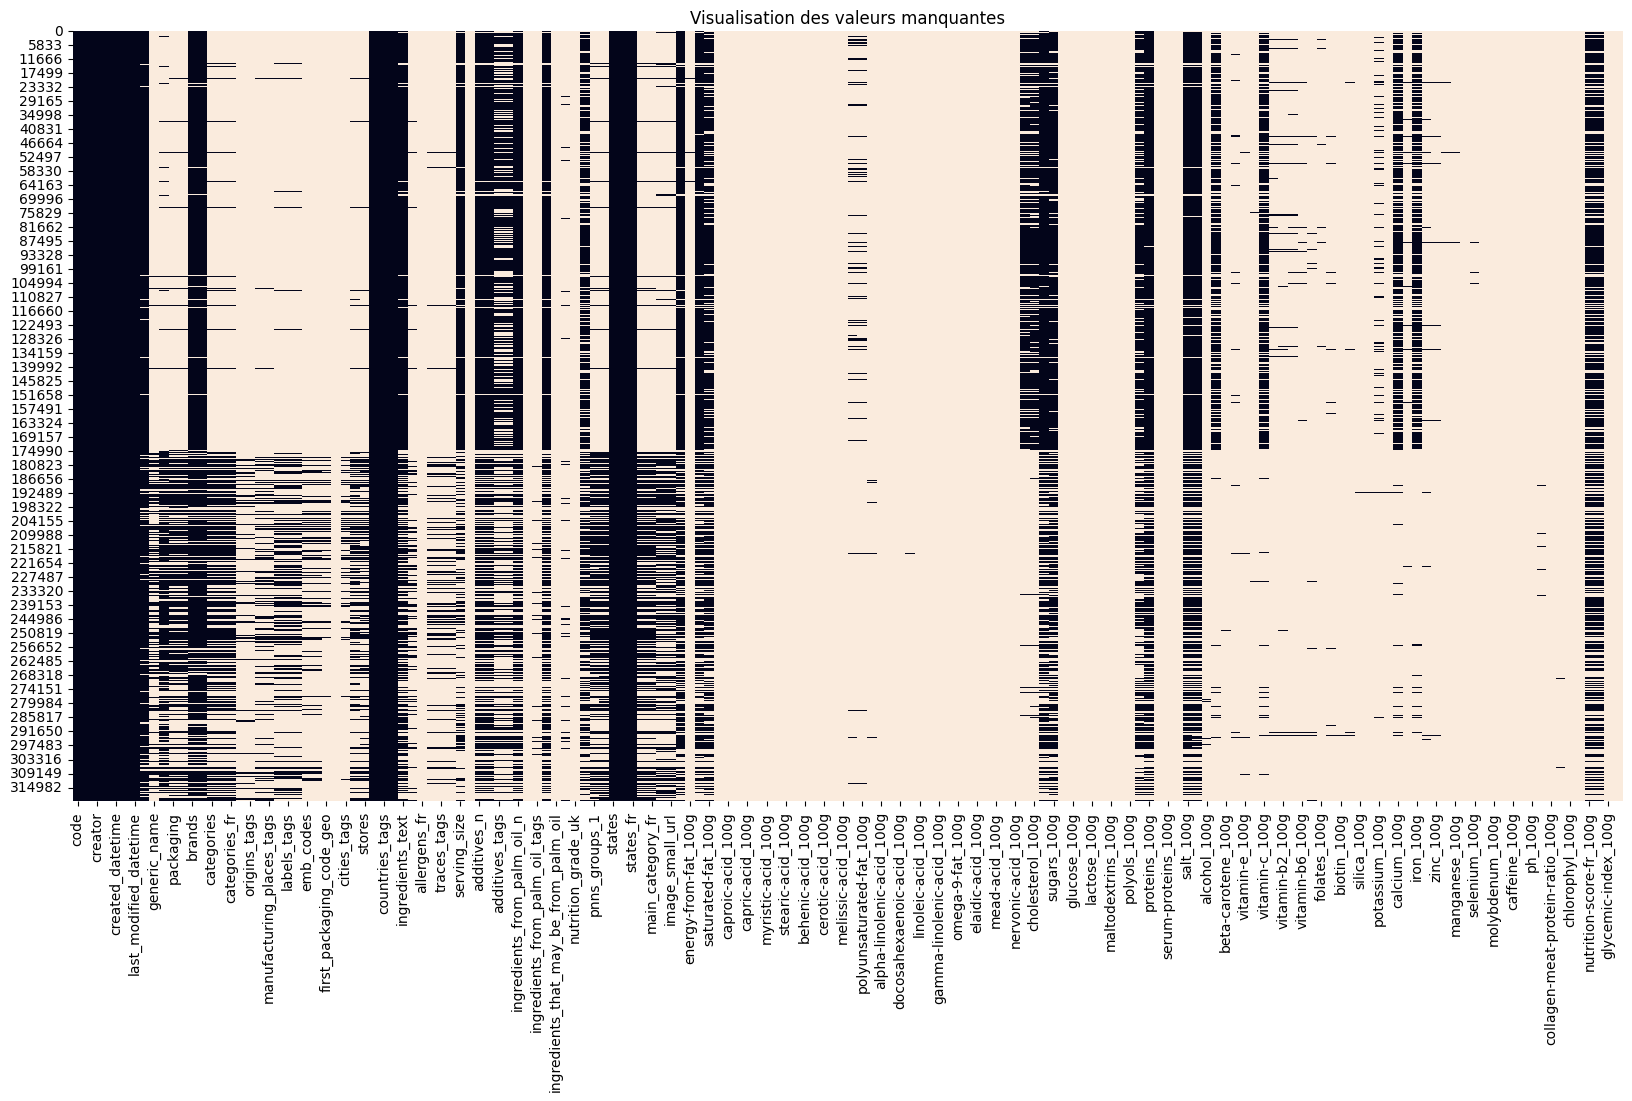

In [14]:
tools.get_missing_value(df,True,True)

#### On supprime les colonnes qui ne sont jamais utilisées

In [15]:
liste_colonne_jamais_utilisees =  tools.get_null_factor(df,100)
liste_colonne_jamais_utilisees

,Variables,Taux_de_Null
0,water-hardness_100g,100.0
1,no_nutriments,100.0
2,ingredients_that_may_be_from_palm_oil,100.0
3,nutrition_grade_uk,100.0
4,nervonic-acid_100g,100.0
5,erucic-acid_100g,100.0
6,mead-acid_100g,100.0
7,elaidic-acid_100g,100.0
8,butyric-acid_100g,100.0
9,caproic-acid_100g,100.0


In [16]:
# On supprime les variables jamais utilisées
old_nb_col = df.shape[1]
elem = liste_colonne_jamais_utilisees['Variables']
df = df.drop(columns=liste_colonne_jamais_utilisees['Variables'],axis=1)
print(f"On a supprimé {old_nb_col - df.shape[1]} colonnes")

On a supprimé 16 colonnes


In [17]:
tools.get_missing_value(df,True,False)

Nombre total de données manquantes dans le dataframe : 34476318 données manquantes sur 46832712 (73.62%)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
nucleotides_100g,320763,100.000000
myristic-acid_100g,320771,100.000000
serum-proteins_100g,320756,100.000000
maltodextrins_100g,320761,100.000000
maltose_100g,320768,100.000000
caprylic-acid_100g,320771,100.000000
capric-acid_100g,320770,100.000000
molybdenum_100g,320761,100.000000
arachidonic-acid_100g,320764,100.000000
lauric-acid_100g,320768,100.000000


------------------------------------------------------------------


In [18]:
get_infos_df(type=False)

--------------GENERAL----------------------------------
taille df : (320772, 146)



# On explore les GENERAL INFORMATION

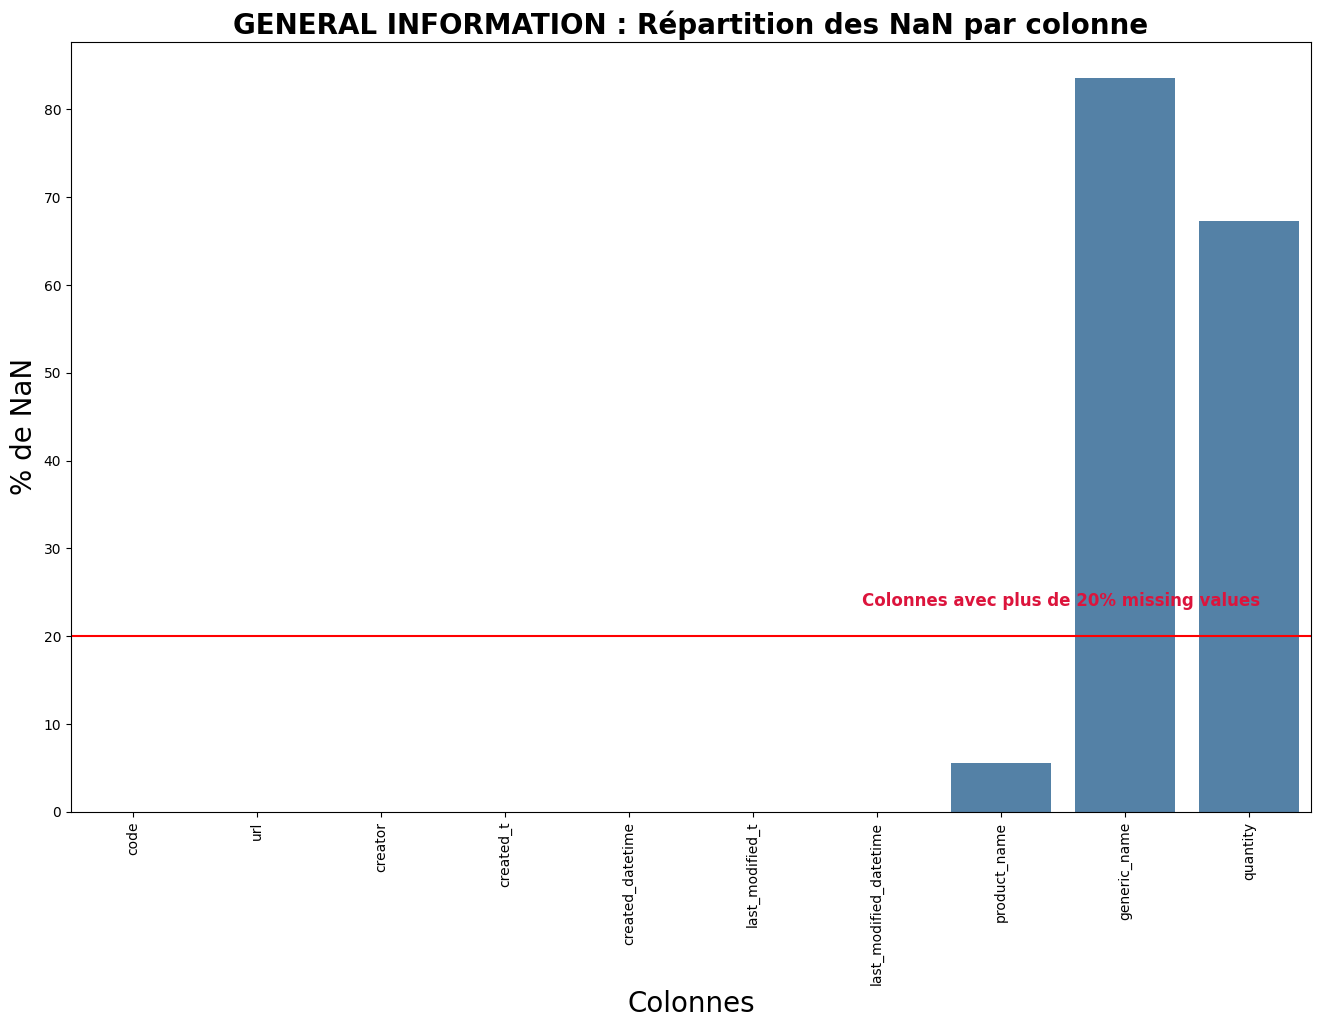

In [40]:
# On affiche la répartition des NaN 
# Les Tags
tools.graph_NAN(data,20,0,10,"GENERAL INFORMATION : Répartition des NaN par colonne")

In [44]:
# Les products name les plus présent
effectifs = df["product_name"].value_counts()
modalites = effectifs.index # contient les modalités

tab = pd.DataFrame(modalites, columns = ["Product_name"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(df) # len(data) renvoie la taille de l'échantillon

tab = tab.sort_values("n",ascending=False) # tri des valeurs de la variable X (croissant)

In [178]:
# On affiche les produits qui apparaissent le plus
tab.head(20)

,Product_name,n,f
0,Ice Cream,410,0.001278
1,Extra Virgin Olive Oil,303,0.000945
2,Potato Chips,281,0.000876
3,Premium Ice Cream,226,0.000705
4,Tomato Ketchup,182,0.000567
5,Beef Jerky,167,0.000521
6,Pinto Beans,162,0.000505
7,Popcorn,157,0.000489
8,Cookies,155,0.000483
9,Salsa,150,0.000468


In [186]:
def info_list_colonnes(df,liste_col,_unique):
    '''
    Information sur les colonnes seeléctionnées
    paramètres : 
    - df
    - list_col : liste des colonne a considérer
    '''
    for i in liste_col:
        
        df_work = df[i]
        print("________")
        print(f"Colonne : {i}")
        print(f"Nombre de valeurs uniques : {df_work.nunique()}")
        print(f"Type de la variable       : {df[i].dtypes}")
        print(f"NaN                       : {round(df_work.isnull().mean()*100,2)} %")
        if _unique:
            print(f"Valeurs unique            : {df[i].unique()}")
        print("")


In [187]:
# List des colonnes information general
liste_information_general = df.iloc[:,0:10].columns
info_list_colonnes(df,liste_information_general,True)

________
Colonne : code
Nombre de valeurs uniques : 320749
Type de la variable       : object
NaN                       : 0.01 %
Valeurs unique            : ['0000000003087' '0000000004530' '0000000004559' ... '9970229501521'
 '9980282863788' '999990026839']

________
Colonne : url
Nombre de valeurs uniques : 320749
Type de la variable       : object
NaN                       : 0.01 %
Valeurs unique            : ['http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao'
 'http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole'
 'http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser'
 ...
 'http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7'
 'http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr'
 'http://world-fr.openfoodfacts.org/produit/999990026839/sugar-free-drink-mix-peach-te

***
- **Variables exclues** : 
    - code : barcode of the product (can be EAN-13 or internal codes for some food stores)
    - url : url of the product page on Open Food Facts
    - creator : contributor who first added the product (redontante avec last_modified_t )
    - created_t : date that the product was added.sum() (UNIX timestamp format) (redontante avec last_modified_t )
    - created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ) 
    - last_modified_datetime (redontante avec last_modified_t)
    - generic_name (84% de na)
    - quantity : quantity and unit : 13826 unités et quantités différentes
***
- **Variables conservées** :
    - **last_modified_t** : date that the product page was last modified (dernières valeurs)
    - **product_name** : name of the product
***

# On explore les TAGS

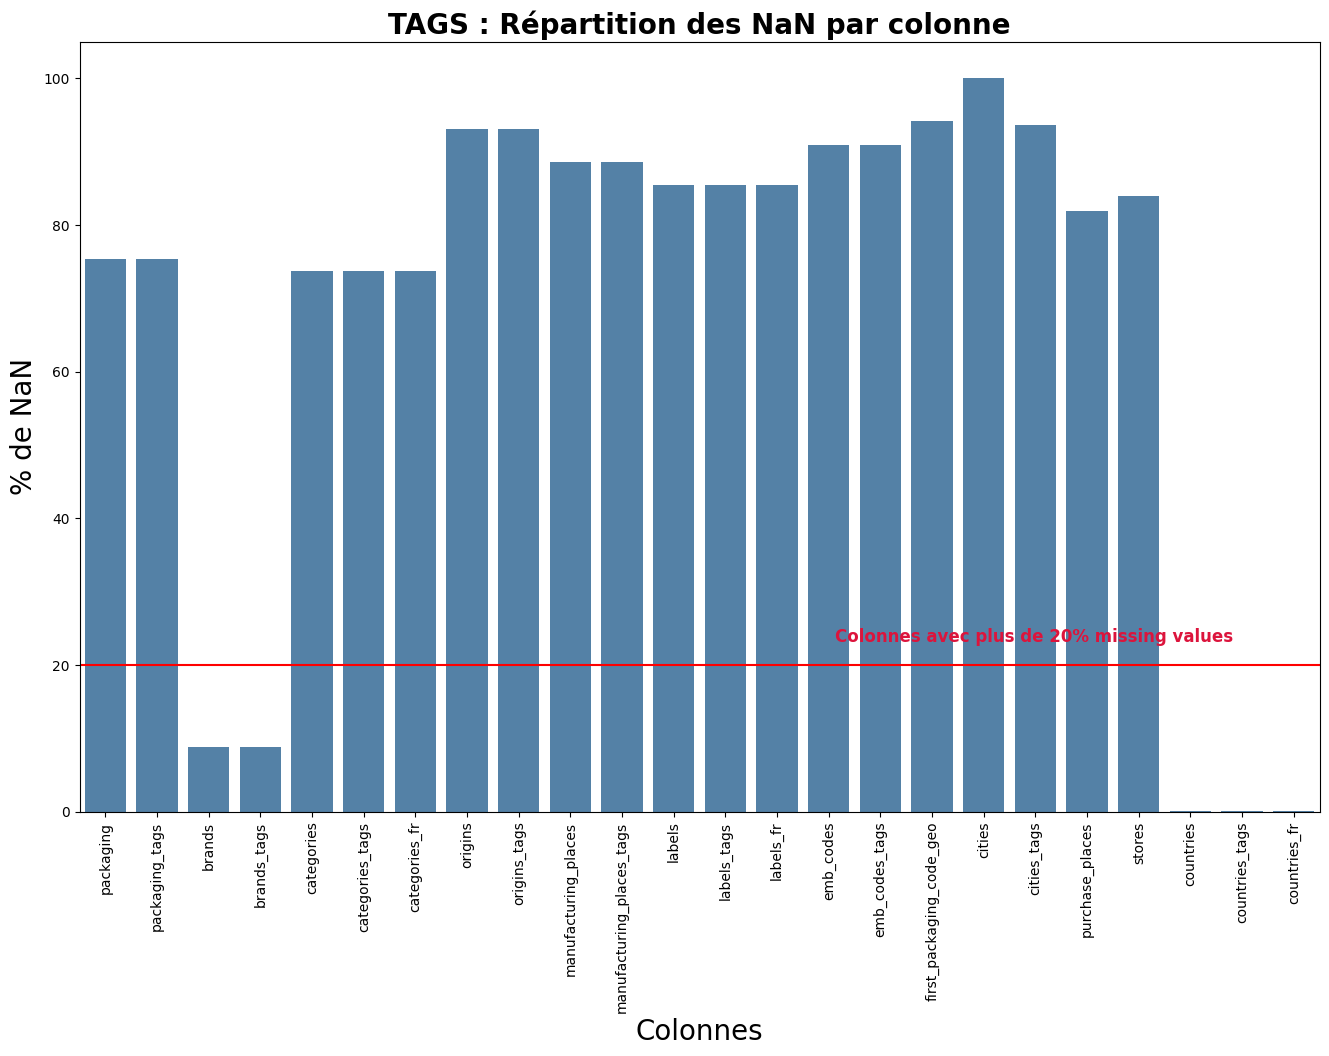

In [41]:
# On affiche les NaN des colonnes TAGS
tools.graph_NAN(data,20,10,34,"TAGS : Répartition des NaN par colonne")

In [189]:
liste_tags = df.iloc[:,10:34].columns
info_list_colonnes(df,liste_tags,True)

________
Colonne : packaging
Nombre de valeurs uniques : 14547
Type de la variable       : object
NaN                       : 75.38 %
Valeurs unique            : [nan 'plastique' 'Frais' ... 'Carton,Tetra Pak,brique'
 'Sachets,Emballage individuel' 'Tetra Pak,Brique,tetra pak']

________
Colonne : packaging_tags
Nombre de valeurs uniques : 12064
Type de la variable       : object
NaN                       : 75.38 %
Valeurs unique            : [nan 'plastique' 'frais' ... 'carton,tetra-pak,brique'
 'sachets,emballage-individuel' 'tetra-pak,brique,tetra-pak']

________
Colonne : brands
Nombre de valeurs uniques : 58784
Type de la variable       : object
NaN                       : 8.86 %
Valeurs unique            : ["Ferme t'y R'nao" nan 'Torn & Glasser' ... 'Roussette du Bugey'
 'Sans marque,D.Lambert' '乐吧']

________
Colonne : brands_tags
Nombre de valeurs uniques : 50253
Type de la variable       : object
NaN                       : 8.86 %
Valeurs unique            : ['ferme-t-y-r-nao

***
- **Variables écartées en raison du nombre de valeurs manquantes ou inutile pour notre application** 
    - packaging : shape, material : matériaux utilisé pour l'emballage 
    - packaging_tags              : derscription de l'emballage
    - brands_tags                 : précision sur la marque
    - categories_tags             : précision sur les catégories en anglais
    - categories_fr               : catégorie des produits  : variable redondante avec categories
    - origins                     : origins of ingredients
    - origins_tags                : précision sur les origines des produits
    - manufacturing_places        : places where manufactured or transformed
    - manufacturing_places_tags   : précision sur les lieu de fabrication des produits
    - labels_tags                 : précision sur les labels
    - labels_fr                   : variable redondante avec labels
    - emb_codes                   : code lieu de fabrication
    - emb_codes_tags              : emb_codes en Majuscule 
    - first_packaging_code_geo    : coordonnées du premier lieu d'emballage 
    - cities                      : inutile 4 valeurs b,c,a 
    - cities_tags                 : ville
    - purchase_places             : Lieu de vente
    - stores                      : enseigne qui vend le produit                   
    - countries_tags              : précision sur les countries
    - countries_fr                : redoudant avec countries
***
- **Variables conservées**
    - **countries** : list de pays ou le produit est vendu
    - **Brands**    : marque du produit
    - **categories** : catégorie de produit
    - **labels**    :  peu nous donner des information important concernant l'idée d'app
***

# On explore les INGREDIENTS

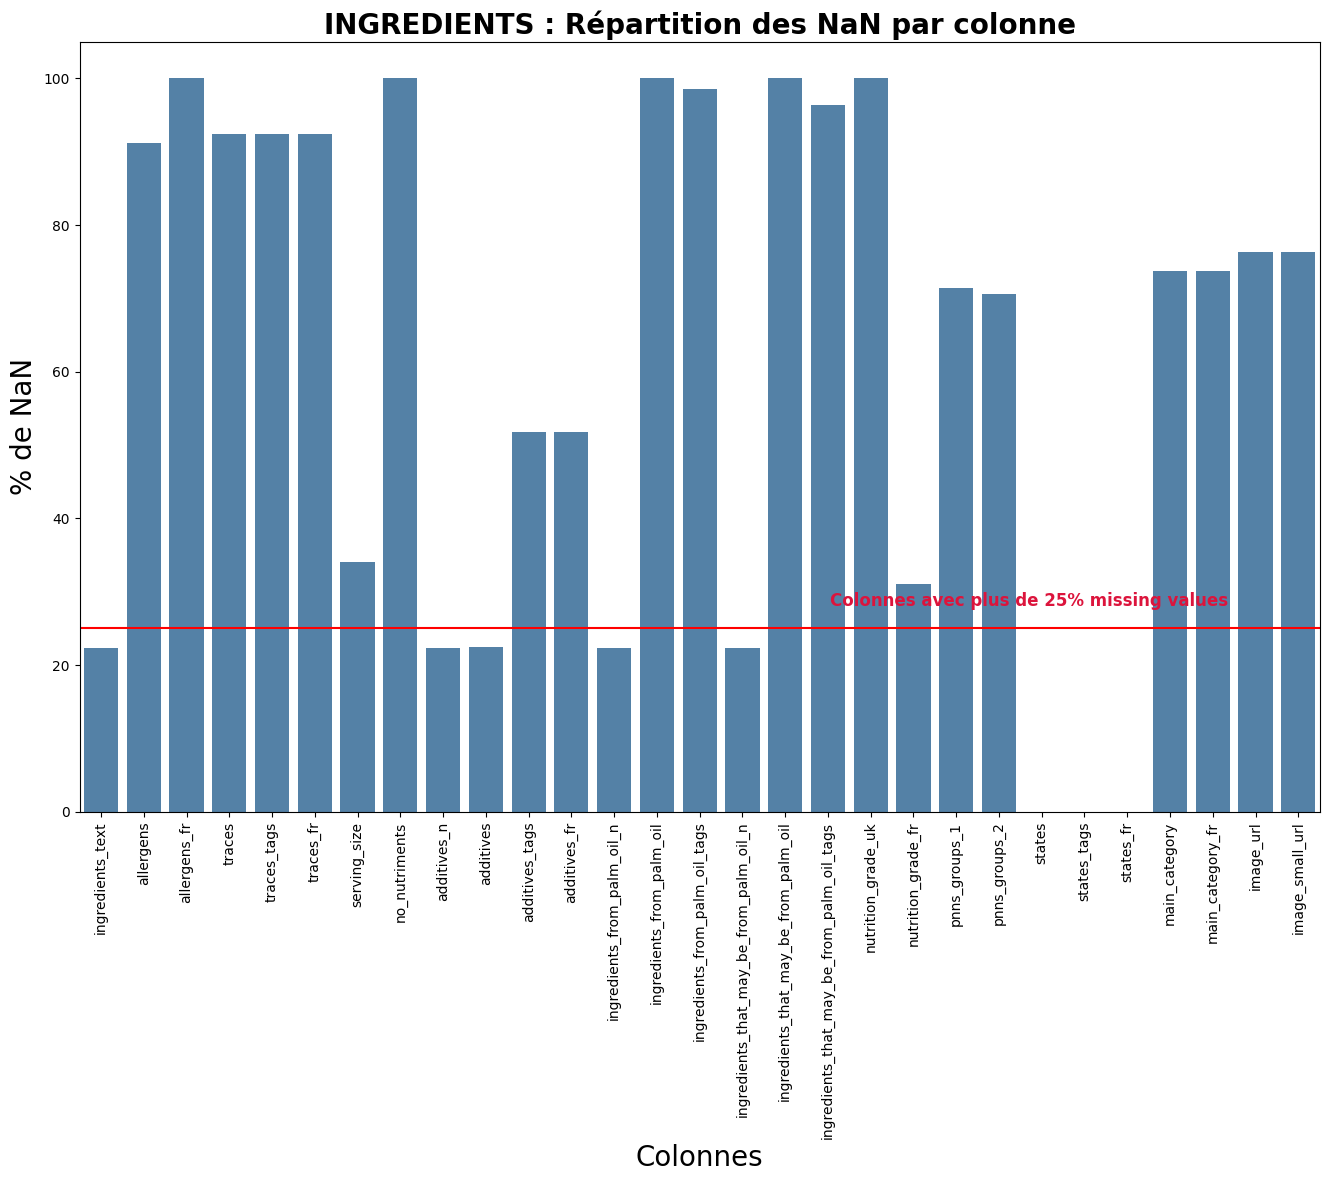

In [183]:
tools.graph_NAN(data,25,34,63,"INGREDIENTS : Répartition des NaN par colonne")

In [190]:
liste_ingredients = df.iloc[:,34:64].columns
info_list_colonnes(df,liste_ingredients,True)

________
Colonne : ingredients_text
Nombre de valeurs uniques : 205520
Type de la variable       : object
NaN                       : 22.39 %
Valeurs unique            : [nan
 'Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.'
 'Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.'
 ...
 "thé vert, arôme naturel bergamote avec autres arômes naturels, écorces d'orange douce 3%"
 "viande d'oie, graisse de canard, épices, sel, poivre."
 'Citric acid, maltodextrin, instant tea, aspartame**, caramel color, natural and artificial flavors, contains less than 2% of: magnesium oxide acesulfame potassium, calcium silicate, yellow 5, red 40.']

________
Colonne : allergens
Nombre de valeurs uniques : 12939
Type de la variable       : object
NaN                       : 91.16 %
Valeurs unique            : [nan 'Blé, Beurre, Oeufs, Noisette'
 '

Nombre de valeurs uniques : 7
Type de la variable       : float64
NaN                       : 22.39 %
Valeurs unique            : [nan  0.  3.  1.  2.  5.  4.  6.]

________
Colonne : ingredients_that_may_be_from_palm_oil_tags
Nombre de valeurs uniques : 160
Type de la variable       : object
NaN                       : 96.35 %
Valeurs unique            : [nan
 'e481-stearoyl-2-lactylate-de-sodium,e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras,e472b-ester-diacetyl-lactique-de-mono-et-diglycerides-d-acides-gras'
 'huile-vegetale' 'e160a-beta-carotene'
 'e471-mono-et-diglycerides-d-acides-gras-alimentaires'
 'e433-monooleate-de-polyoxyethylene-de-sorbitane'
 'e160a-beta-carotene,e433-monooleate-de-polyoxyethylene-de-sorbitane'
 'e432-monolaurate-de-polyoxyethylene-sorbitane'
 'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras'
 'e433-monooleate-de-polyoxyethylene-de-sorbitane,e470a-stearate-

________
Colonne : pnns_groups_1
Nombre de valeurs uniques : 14
Type de la variable       : object
NaN                       : 71.47 %
Valeurs unique            : [nan 'unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Composite foods' 'Fish Meat Eggs' 'Beverages'
 'Fat and sauces' 'fruits-and-vegetables' 'Milk and dairy products'
 'Salty snacks' 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']

________
Colonne : pnns_groups_2
Nombre de valeurs uniques : 42
Type de la variable       : object
NaN                       : 70.54 %
Valeurs unique            : [nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals'
 'vegetables' 'Soups' 'Chocolate products' 'Alcoholic beverages' 'Fruits'
 'Sandwich' 'Cereals' 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers'
 'Nuts' 'Breakfast cereals' 'Artificially sweetened beverages'
 'Fruit

Nombre de valeurs uniques : 75836
Type de la variable       : object
NaN                       : 76.36 %
Valeurs unique            : [nan
 'http://fr.openfoodfacts.org/images/products/000/000/002/4600/front.3.200.jpg'
 'http://fr.openfoodfacts.org/images/products/000/000/002/7205/front.3.200.jpg'
 ... 'http://fr.openfoodfacts.org/images/products/9918/front.3.200.jpg'
 'http://fr.openfoodfacts.org/images/products/993/501/000/0003/front.6.200.jpg'
 'http://fr.openfoodfacts.org/images/products/997/022/950/1521/front.3.200.jpg']

________
Colonne : energy_100g
Nombre de valeurs uniques : 3997
Type de la variable       : float64
NaN                       : 18.6 %
Valeurs unique            : [    nan 2243.   1941.   ... 4602.     76.1   448.59]

________
Colonne : energy-from-fat_100g
Nombre de valeurs uniques : 335
Type de la variable       : float64
NaN                       : 99.73 %
Valeurs unique            : [    nan  441.    275.      0.    451.   1110.   1460.   1260.   1150.
 1240. 

***
- **Variables écartées en raison du nombre de valeurs manquantes ou inutile pour notre application**  
    - ingredients_text : composition des produits
    - allergens : produit allergique
    - allergens_fr : image 
    - traces : produit pouvant contenir des traces d'autres résidus en raison de l'endroit de production
    - traces_tags : allergene prefixé par en:
   
    - serving_size : serving size in g
    - no_nutriments : indicates if the nutrition facts are indicated on the food label
    - additives_n : number of food additives
    - additives
    - additives_tags
    - ingredients_from_palm_oil_n
    - ingredients_from_palm_oil
    - ingredients_from_palm_oil_tags
    - ingredients_that_may_be_from_palm_oil_n
    - ingredients_that_may_be_from_palm_oil
    - ingredients_that_may_be_from_palm_oil_tags
    - nutrition_grade_fr : nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore
    - main_category
    - main_category_fr
    - image_url
    - image_small_url
***
- **Variables conservées**
    - trace_fr : beaucoup de NaN mais pourrait être utile


# On explore les NUTRITION FACTS

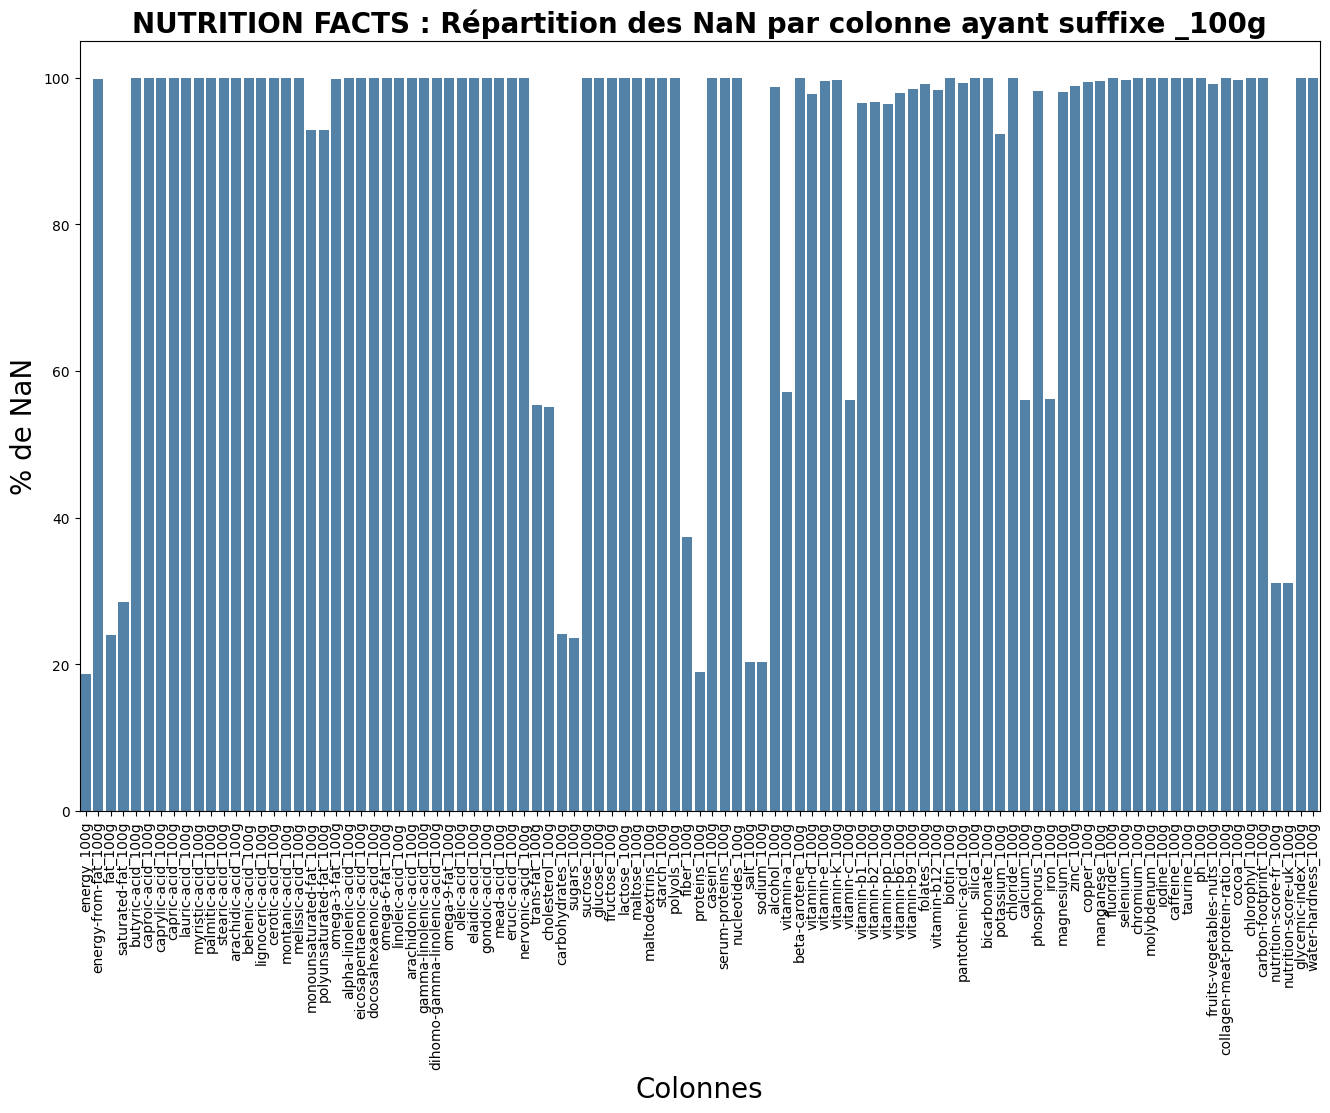

In [184]:
tools.graph_NAN(data,False,63,165,"NUTRITION FACTS : Répartition des NaN par colonne ayant suffixe _100g")

In [193]:
liste_nutrition_facts = df.iloc[:,63:135].columns


- INFORMATION GENERAL 
    - Variable conservées
        - countries : list de pays ou le produit est vendu
        - Brands : marque du produit
        - categories
        - labels : peu nous donner des information important concernant l'idée d'app
- TAGS   
    - Variable conservées
        - last_modified_t : date that the product page was last modified (dernières valeurs)
        - product_name : name of the product

# Idée d'application 
***
- **L'idée de l'application** : Aider les personnes en situation d'insuffisance rénale à être informer sur les produits à surveiller.

    - Calcium_100g
    - sodium_100g
    - salt_100g
    - proteins_100g
    - iron_100g
    - potassium_100g
    - nutrition-score-fr_100g

***

## 3.1 Selection des colonnes information non numériques utiles pour notre application

In [22]:
# Le code ne peut etre utilisé comme index car non unique
doublon_code = df[df.duplicated(['code'],keep=False)]
doublon_code.shape

(23, 146)

https://www.kaggle.com/code/michaelfumery/openfoodfacts-data-cleaning

- Les types semblent cohérent avec ce qu'ils représentent

In [23]:
tools.get_description_variables(df,type_var='categ')

,count,unique,top,freq,first,last
code,320749,320749,0000000003087,1,NaT,NaT
url,320749,320749,http://world-fr.openfoodfacts.org/produit/0000...,1,NaT,NaT
creator,320770,3535,usda-ndb-import,169868,NaT,NaT
created_t,320749,189556,2017-03-09 16:32:00,20,1970-01-01 00:00:00,2017-04-21 01:15:03
created_datetime,320748,189555,2017-03-09 16:32:00,20,2012-01-31 14:43:58,2017-04-21 01:15:03
last_modified_t,320749,180491,2015-08-09 17:35:42,33,2012-03-21 22:15:32,2017-04-21 01:15:04
last_modified_datetime,320749,180491,2015-08-09 17:35:42,33,2012-03-21 22:15:32,2017-04-21 01:15:04
product_name,303010,221347,Ice Cream,410,NaT,NaT
generic_name,52795,38584,Pâtes alimentaires au blé dur de qualité supér...,201,NaT,NaT
quantity,104819,13826,500 g,4669,NaT,NaT


In [24]:
tools.get_description_variables(df,type_var='num')

,count,mean,std,min,25%,50%,75%,max
additives_n,248939.0,1.936024,2.502019e+00,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
ingredients_from_palm_oil_n,248939.0,0.019659,1.405241e-01,0.000000,0.000000e+00,0.000000,0.000000,2.000000e+00
ingredients_that_may_be_from_palm_oil_n,248939.0,0.055246,2.692074e-01,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00
energy_100g,261113.0,1141.914605,6.447154e+03,0.000000,3.770000e+02,1100.000000,1674.000000,3.251373e+06
energy-from-fat_100g,857.0,585.501214,7.128099e+02,0.000000,4.940000e+01,300.000000,898.000000,3.830000e+03
fat_100g,243891.0,12.730379,1.757875e+01,0.000000,0.000000e+00,5.000000,20.000000,7.142900e+02
saturated-fat_100g,229554.0,5.129932,8.014238e+00,0.000000,0.000000e+00,1.790000,7.140000,5.500000e+02
caprylic-acid_100g,1.0,7.400000,NaN,7.400000,7.400000e+00,7.400000,7.400000,7.400000e+00
capric-acid_100g,2.0,6.040000,2.262742e-01,5.880000,5.960000e+00,6.040000,6.120000,6.200000e+00
lauric-acid_100g,4.0,36.136182,2.410143e+01,0.044730,3.466118e+01,47.600000,49.075000,4.930000e+01


<a href='#sommaire'>
    <img src="assets/img/menu.jpg" />
</a>

https://www.kaggle.com/code/ymmn233413/youssef-moumna-p3-02-notebook-v0-ipynb

<a href='#sommaire'>
    <img src="assets/img/menu.jpg" />
</a>